#  About the Dataset
The dataset provided contains information related to graduate school admissions. It includes various factors that are commonly considered during the admissions process, such as GRE scores, TOEFL scores, university rating, statement of purpose (SOP) and letter of recommendation (LOR) strength, undergraduate GPA, research experience, and the chance of admission.

The dataset consists of 400 entries, each representing an individual applicant. The specific attributes included are as follows:

- **GRE Scores**: This attribute represents the applicant's GRE score and is measured on a scale of 0 to 340.

- **TOEFL Scores**: This attribute denotes the applicant's TOEFL score and is measured on a scale of 0 to 120.

- **University Rating**: This attribute reflects the rating of the university where the applicant completed their undergraduate studies. It is measured on a scale of 1 to 5.

- **Statement of Purpose (SOP) and Letter of Recommendation (LOR) Strength**: These attributes assess the quality and strength of the applicant's SOP and LOR. They are measured on a scale of 1 to 5.

- **Undergraduate GPA**: This attribute represents the applicant's undergraduate grade point average and is measured on a scale of 0 to 10.

- **Research Experience**: This attribute indicates whether the applicant has any research experience, with a value of either 0 or 1, representing no research experience and having research experience, respectively.

- **Chance of Admit**: This attribute represents the likelihood of an applicant's admission and is measured on a scale from 0 to 1.

## Data Preprocessing

In [201]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [202]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#regression packages
import sklearn.linear_model as lm

#model validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

#model evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

#f_regression (feature selection)
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

# recursive feature selection (feature selection)
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import export_text
from sklearn.tree import DecisionTreeClassifier

#import logisticregression classifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
#import knn classifier
from sklearn.neighbors import KNeighborsClassifier
#import randomforest classifier
from sklearn.ensemble import RandomForestClassifier
# import advanced algorithms
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

#for validating your classification model
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

# grid search
from sklearn.model_selection import GridSearchCV

# others
import statsmodels.api as sm
from statsmodels.formula.api import ols

#ignore warning
import warnings
warnings.filterwarnings("ignore")


In [203]:
df = pd.read_csv('/content/drive/My Drive/Materials/data.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [204]:
# inspect the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


* There are *400*  rows and *9* columns in this dataset.

In [205]:
# check the number of missing values for each column
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

* There is no missing values in the dataset.

In [206]:
# check duplicates of the data
mask = df.duplicated(keep=False)
print(mask)

0      False
1      False
2      False
3      False
4      False
       ...  
395    False
396    False
397    False
398    False
399    False
Length: 400, dtype: bool


In [207]:
# display those duplicate rows for review
df[mask]

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit


* There is no duplicate in the dataset.

In [208]:
# a statistical summay
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [209]:
# Rename column names
df.columns = ['ID', 'GRE_Score','TOEFL_Score','University_Rating','SOP','LOR','CGPA','Research','Admission_Chance']
df.head()

,ID,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Admission_Chance
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [210]:
# check column names and number of unique values
df.nunique()

ID                   400
GRE_Score             49
TOEFL_Score           29
University_Rating      5
SOP                    9
LOR                    9
CGPA                 168
Research               2
Admission_Chance      60
dtype: int64

## Correlation Analysis

In [211]:
# correlation analysis(exclude ID column)
columns_to_include = df.columns[df.columns != 'ID']
df[columns_to_include].corr()['Admission_Chance']

GRE_Score            0.802610
TOEFL_Score          0.791594
University_Rating    0.711250
SOP                  0.675732
LOR                  0.669889
CGPA                 0.873289
Research             0.553202
Admission_Chance     1.000000
Name: Admission_Chance, dtype: float64

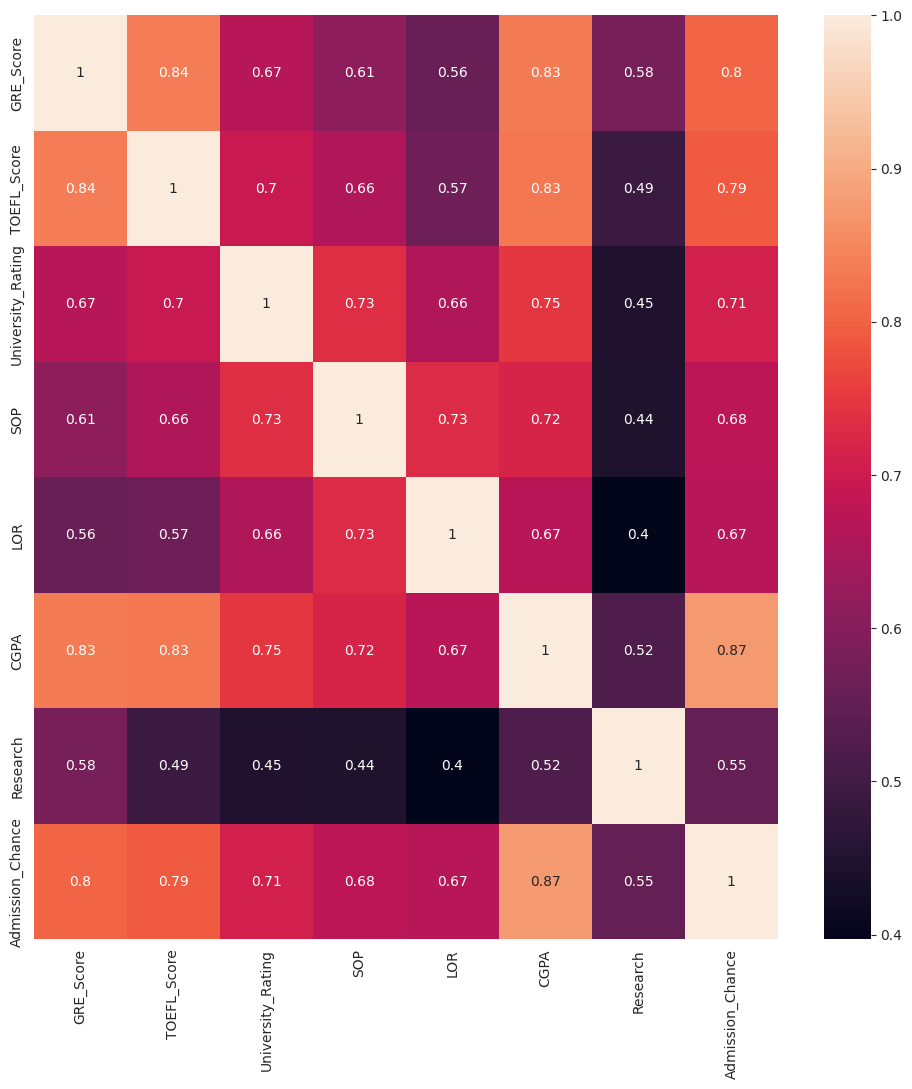

In [212]:
# correlation heatmap
plt.figure(figsize=(12,12))
sns.heatmap(df[columns_to_include].corr(), annot=True);

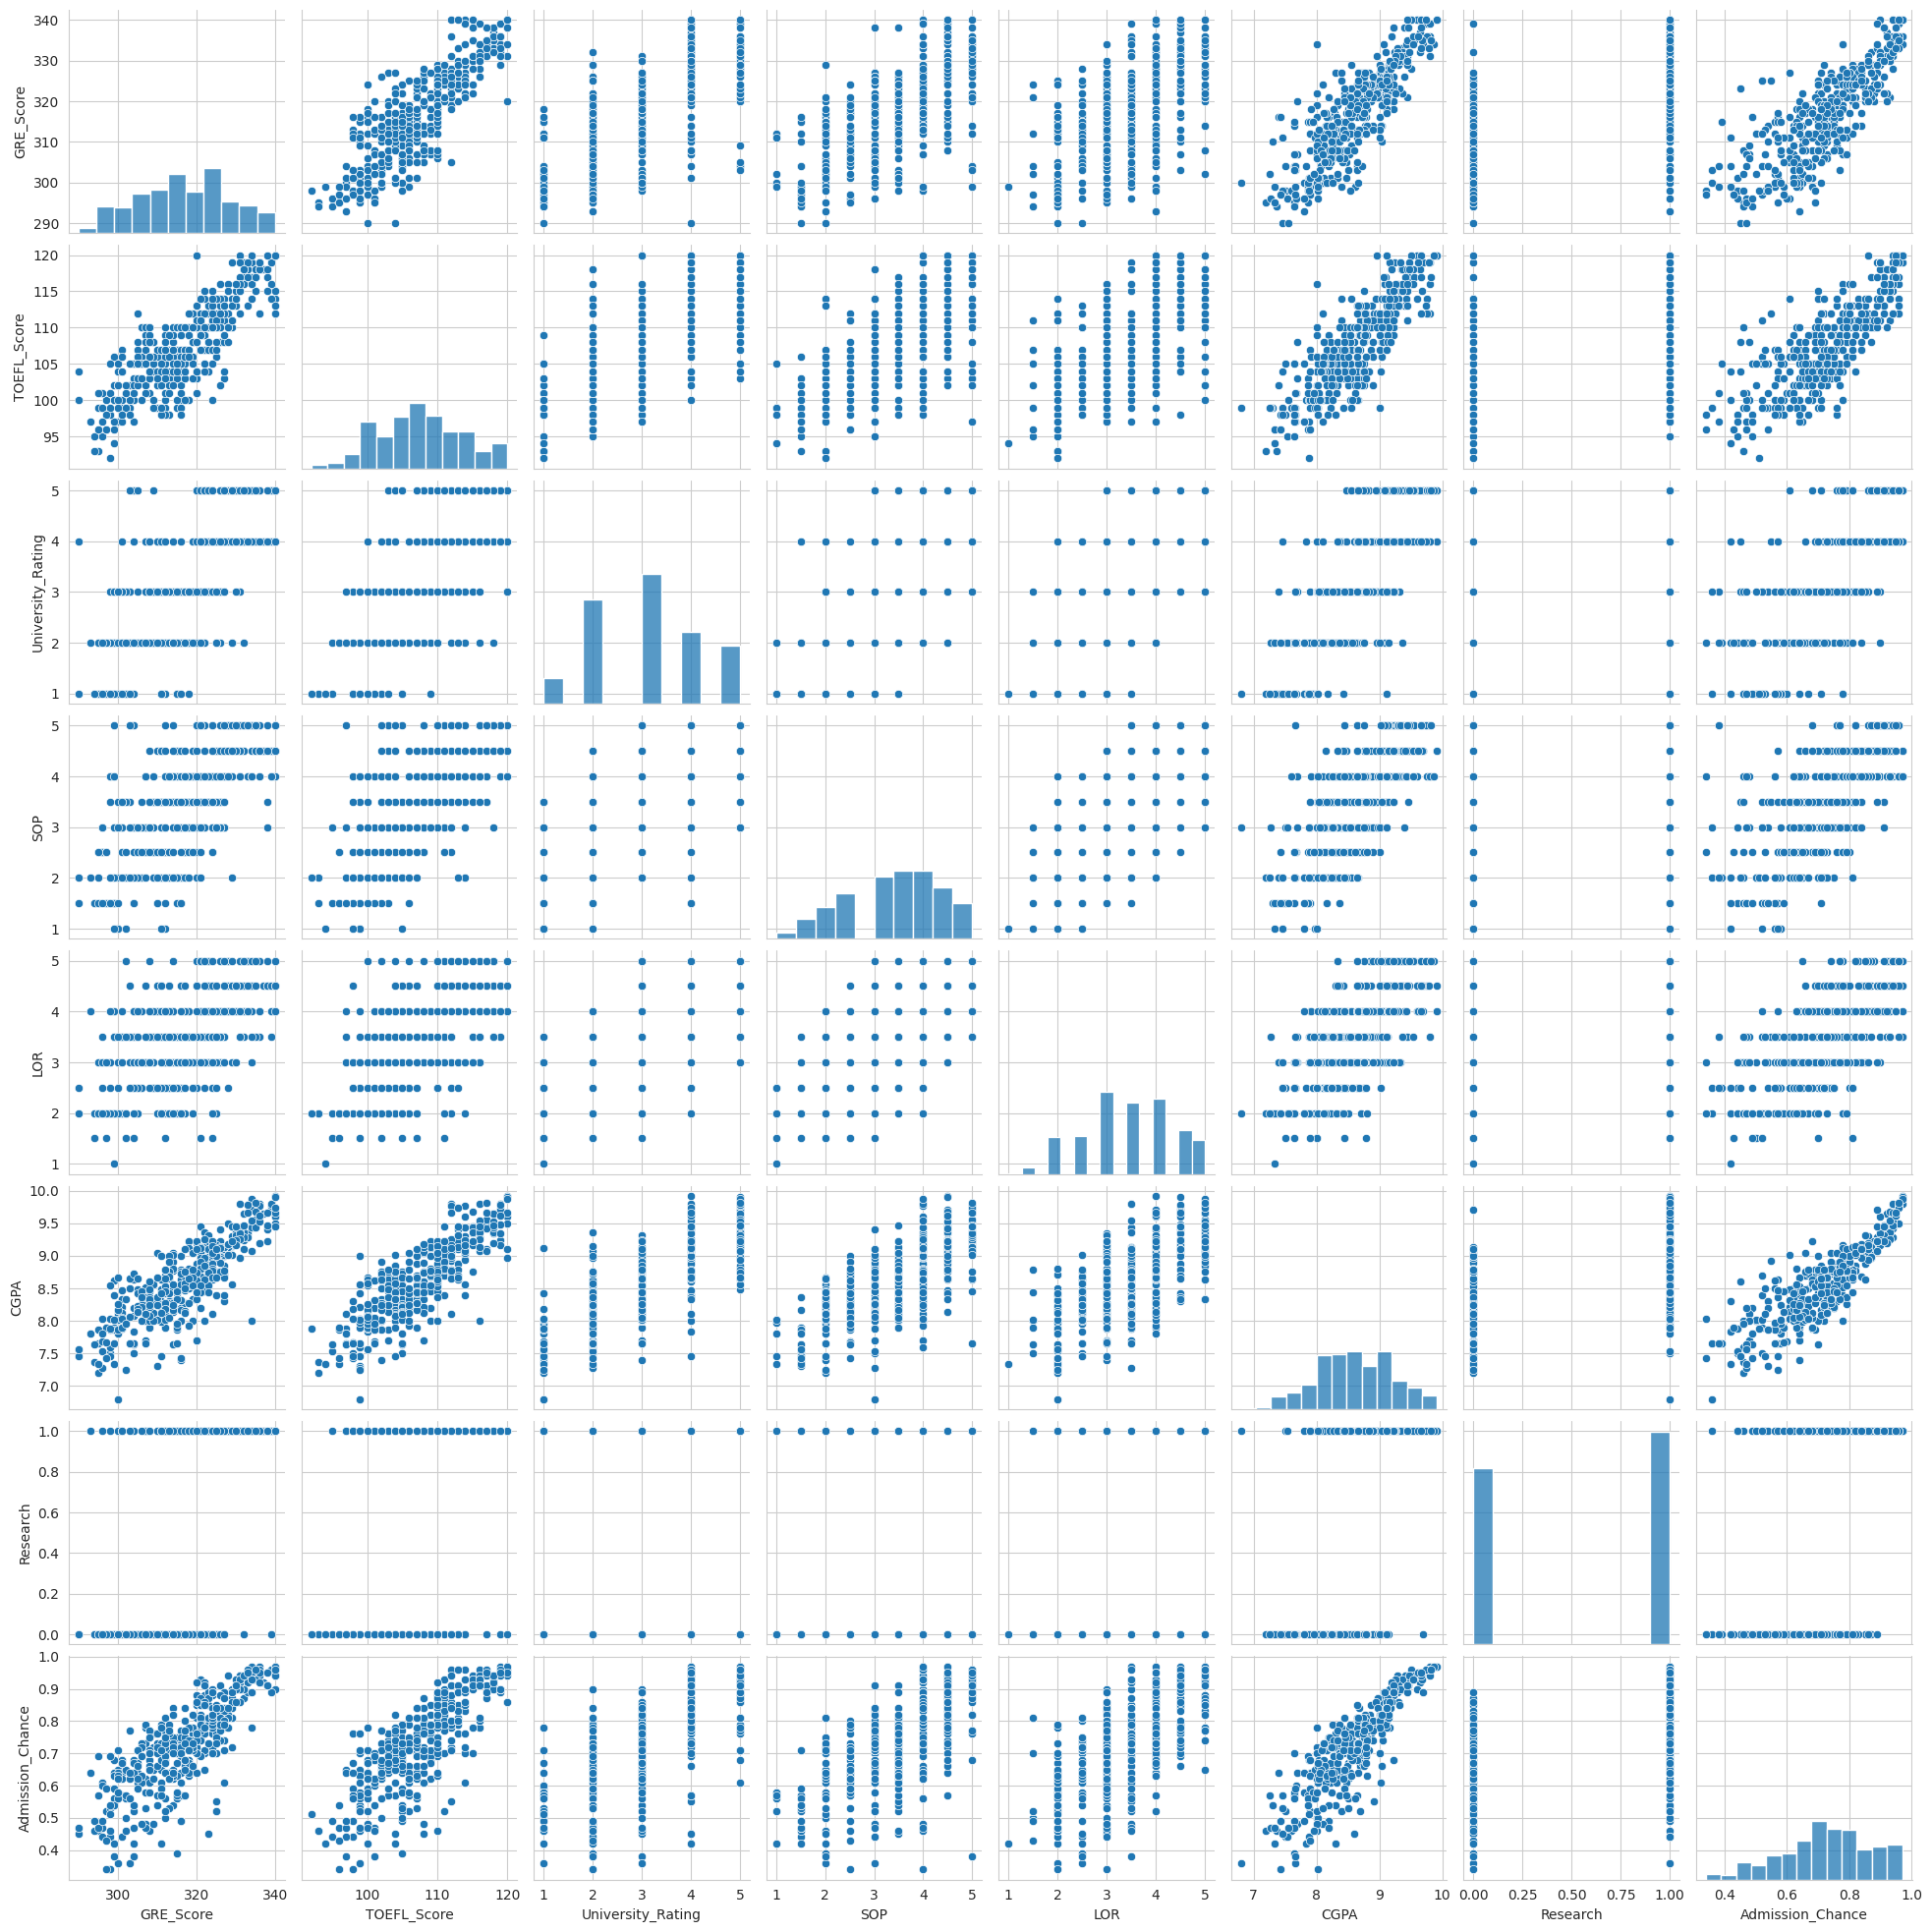

In [213]:
# correlation plot(scatter plot)
sns.pairplot(df[columns_to_include])

* In the pairplot, it's evident that the "Admission Chance" exhibits a strong linear regression correlation with CPGA, TOEFL, and GRE scores. Let's create separate individual plots for each of these variables.

Text(0.5, 1.0, 'Relationship between CGPA and Admission_Chance')

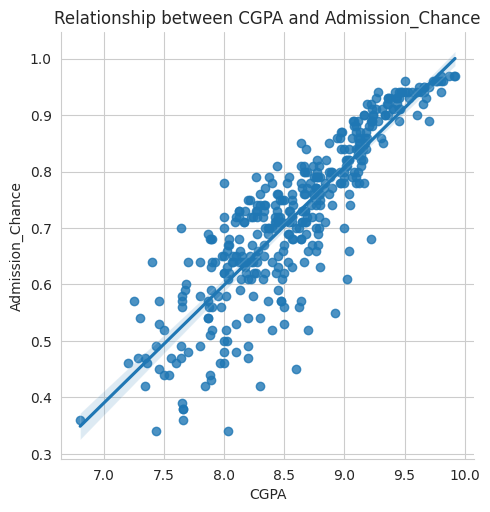

In [214]:
# lmplot for CGPA and Admission_Chance（Plot data and regression model）
sns.lmplot(x='CGPA', y='Admission_Chance', data=df[columns_to_include])
ax = plt.gca()# gca stands for get the current axes
ax.set_title("Relationship between CGPA and Admission_Chance")

Text(0.5, 1.0, 'Relationship between TOEFL_Score and Admission_Chance')

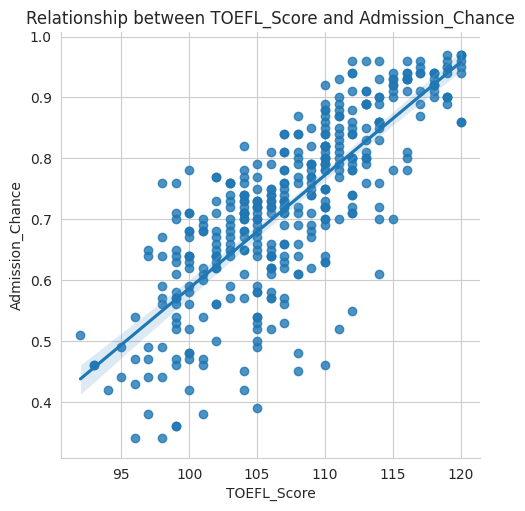

In [215]:
# lmplot for TOEFL_Score and Admission_Chance（Plot data and regression model）
sns.lmplot(x='TOEFL_Score', y='Admission_Chance', data=df[columns_to_include])
ax = plt.gca()
ax.set_title("Relationship between TOEFL_Score and Admission_Chance")

Text(0.5, 1.0, 'Relationship between GRE_Score and Admission_Chance')

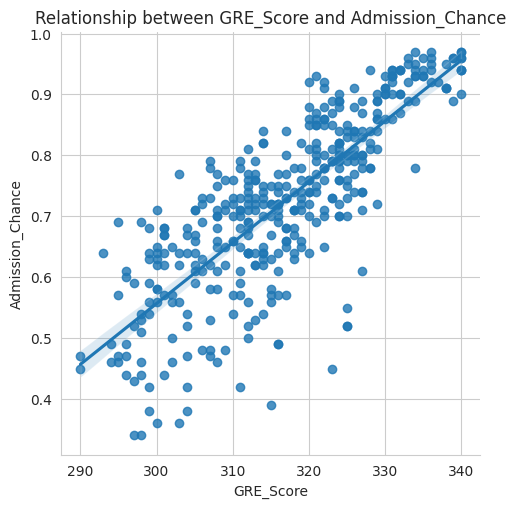

In [216]:
# lmplot for TOEFL_Score and Admission_Chance（Plot data and regression model）
sns.lmplot(x='GRE_Score', y='Admission_Chance', data=df[columns_to_include])
ax = plt.gca()
ax.set_title("Relationship between GRE_Score and Admission_Chance")

In [217]:
# check the correlation between X variables
# drop Admission_Chance column and only keep the X variables
df1=df.drop(columns=['Admission_Chance','ID'], axis=1)
df1.head(2)

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1


<Axes: >

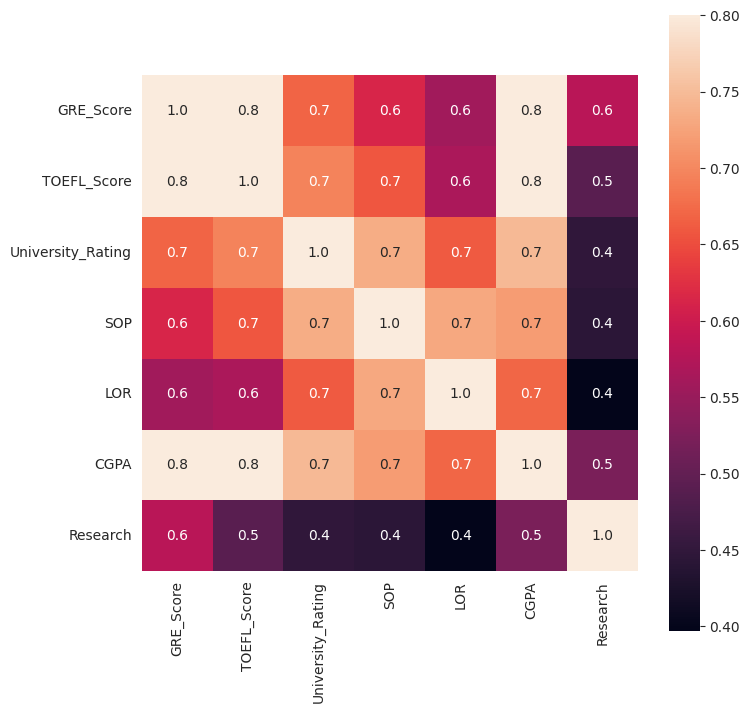

In [218]:
# correlation plot
plt.figure(figsize=(8,8))
sns.heatmap(df1.corr(), vmax=.8, square=True,annot=True, fmt=".1f")

### Insights of Correlation Analysis

***The results of the correlation analysis***

* **Admission_Chance** has **positive correlation** with each attribute(GRE_Score, TOEFL_Score, CGPA, Uniersity_Rating,Statement of Purpose,Letter of Recommendation and whether they have research experience or not).
* Among the factors above **Admission_Chance** has **high positive correlation** with **_CGPA, TOEFL_Score and GRE_Score_**.
* Among the factors above **Admission_Chance** has **relatively lower correlation** with **_Research Experience_**.

## Regression Analysis

**Normalization of the data**


* Normalization is useful when the data has varying scales. The goal of normalization is to transform features to be on a similar scale. This improves the performance and training stability of the model.

- **What is normalization?**
* Normalization is a general term related to the scaling of the variables. Scaling transforms a set of variables into a new set of variables that have the same order of magnitude. It’s usually a linear transformation, so it doesn’t affect the correlation or the predictive power of the features.

* Why do we need to normalize our data? Because some models are sensitive to the order of magnitude of the features. If a feature has an order of magnitude equal to 1000, for example, and another feature has an order of magnitude equal to 10, some models may “think” that the first feature is more important than the second one. It’s obviously a bias, because the order of magnitude doesn’t give us any information about the predictive power. So, we need to remove this bias by transforming the variables to give them the same order of magnitude. This is the role of the scaling transformations.
**NOTES**
- Normalization is preferred over standardization when our data doesn't follow a normal distribution. It can be useful in those machine learning algorithms that do not assume any distribution of data like the k-nearest neighbor and neural networks.
- Normalization is used to scale the features to a range of 0 to 1, while standardization is used to scale the features to have a mean of 0 and a standard deviation of 1.  Standardization is used on data having Gaussian distribution. Normalization scales in a range of [0,1] or [-1,1]. Standardization is not bounded by range.

In [219]:
# Apply normalizer to our data and run regresssion analysis
y = df['Admission_Chance']
X = df.drop(columns=['Admission_Chance','ID'], axis=1)

{'whiskers': [<matplotlib.lines.Line2D at 0x7d14996929e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7d1499692f20>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d1499692680>,
 'medians': [<matplotlib.lines.Line2D at 0x7d1499693460>,
 'fliers': [<matplotlib.lines.Line2D at 0x7d1499693700>,
 'means': []}

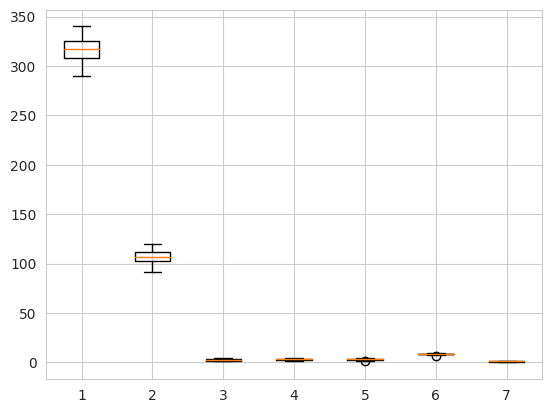

In [220]:
# data is not scaled ... some columns have wide scales
plt.boxplot(X)

In [221]:
# Check X variables
X.head(2)

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1


In [222]:
# import package for normalization
from sklearn.preprocessing import Normalizer

In [223]:
# define X and Y variables
y = df['Admission_Chance']
X = df.drop(columns=['Admission_Chance','ID'], axis=1)

# model building
scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)
normalizedX

array([[0.94325766, 0.33028013, 0.01119594, ..., 0.01259543, 0.0270102 ,
        0.00279898],
       [0.94902131, 0.31341136, 0.01171631, ..., 0.01318085, 0.02598092,
        0.00292908],
       [0.94947033, 0.3124839 , 0.00901396, ..., 0.01051629, 0.02403722,
        0.00300465],
       ...,
       [0.94282808, 0.33141836, 0.01142822, ..., 0.01285675, 0.02699917,
        0.00285705],
       [0.94908993, 0.31332136, 0.00912586, ..., 0.01216782, 0.02670836,
        0.        ],
       [0.94288769, 0.33128486, 0.01132598, ..., 0.01132598, 0.02735224,
        0.00283149]])

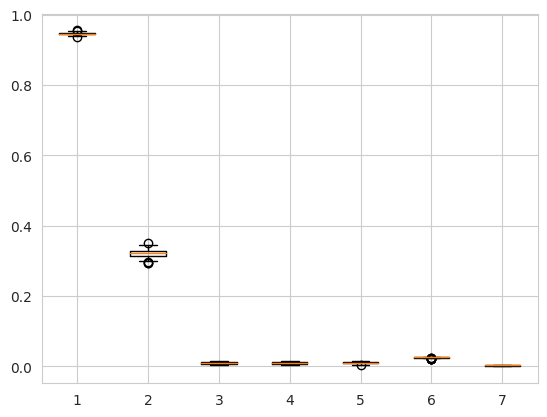

In [224]:
# Visualize the normalized data using boxplot(data is normalized ,all columns are in same scale)
plt.boxplot(normalizedX);

#### Model 1 (full model)

**Model Validation: Split validation**

In [225]:
# split validation (70% training & 30% testing data)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(280, 7) (280,) (120, 7) (120,)


In [226]:
# let's double check the split data size

print(len(df))
print(len(df) * 0.7)        # 70% of the original data
print(len(df) * 0.3)        # 30% of the original data

400
280.0
120.0


**Model Building(Linear Regression Model)**

In [227]:
# build full model using all variables
model1 = lm.LinearRegression()
model1.fit(X_train, y_train)
model1_y = model1.predict(X_test)# generate predicted y for model evaluation

In [228]:
# this is regression so it has coefficients and y-intercept

print('Coefficients: ', model1.coef_)
print("y-intercept ", model1.intercept_)

Coefficients:  [ 0.00186803  0.0022731   0.00270635 -0.0030745   0.02071688  0.13025483
  0.02269622]
y-intercept  -1.3144070910249157


> **NOTES**

**Coefficient (Slope)** :
- The coefficient (also known as the slope) represents the change in the dependent variable for a one-unit change in the corresponding independent variable while holding all other variables constant. In mathematical terms, if you have a variable X with coefficient β₁, then the interpretation would be:

- "For a one-unit increase in X, the dependent variable (Y) is expected to change by β₁ units, all other factors remaining constant."

- If β₁ is positive, it indicates that an increase in X is associated with an increase in Y. If β₁ is negative, it suggests that an increase in X is associated with a decrease in Y.

**Intercept**:
- The intercept (often denoted as β₀) represents the value of the dependent variable when all independent variables are zero. In some cases, this interpretation might not make sense (e.g., having negative GRE scores). The intercept provides the baseline value of the dependent variable.

- In simple terms, the intercept is the value of Y when all predictors are zero.

In [229]:
# show coefficients in dataframe
pd.DataFrame(list(zip(X.columns, np.transpose(model1.coef_)))).round(2)

,0,1
0,GRE_Score,0.00
1,TOEFL_Score,0.00
2,University_Rating,0.00
3,SOP,-0.00
4,LOR,0.02
5,CGPA,0.13
6,Research,0.02


In [230]:
print("mean square error: ", mean_squared_error(y_test, model1_y))
print("variance or r-squared: ", explained_variance_score(y_test, model1_y))

mean square error:  0.004377217459382592
variance or r-squared:  0.746175686389339


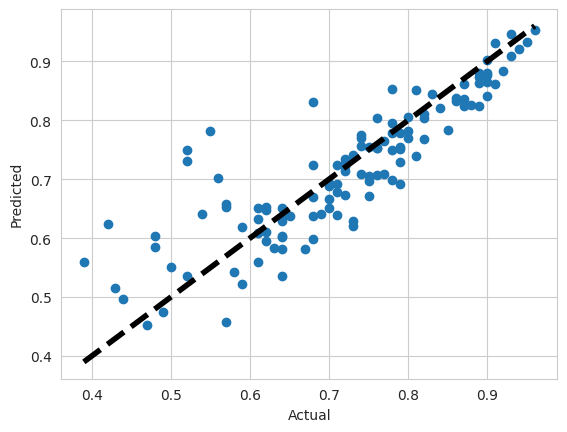

In [231]:
plt.subplots()
plt.scatter(y_test, model1_y)       # showing actual y as X-axis and predicted y as Y-axis
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)   #dotted line represents perfect prediction (actual = predicted)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

#### Feature Selection

> **Feature selection**  is the process of identifying and selecting a subset of input variables that are most relevant to the target variable.

This process can provide several benefits:

**Improved Model Performance**:
Including irrelevant or redundant features in your regression model can lead to overfitting, where the model learns noise from the data rather than the underlying patterns. By selecting only the most relevant features, you reduce the risk of overfitting and improve the generalization ability of the model to unseen data.

**Simpler and Interpretable Models**:
A model with fewer features is often simpler and easier to interpret. It becomes more straightforward to explain the relationships between the selected features and the target variable to stakeholders or decision-makers.

**Reduced Computational Complexity**:
Using a smaller set of features reduces the computational burden of training and deploying the model. This is particularly important when dealing with large datasets or real-time applications.

**Mitigating Multicollinearity**:
When multiple features are highly correlated, it can cause multicollinearity issues in the regression model. Multicollinearity can make it difficult to distinguish the individual effects of correlated features on the target variable. Feature selection can help mitigate this problem by choosing only one representative feature from a group of correlated features.

**Enhanced Model Interpretation**:
A model with a limited number of features is easier to interpret. It allows you to focus on the most influential variables and their effects on the target variable, aiding in decision-making and understanding the driving factors.
> **"SelectKBest"**

**"SelectKBest"** is a feature selection technique commonly used in machine learning to select the top k features (independent variables) from a dataset based on their importance or relevance with respect to the target variable. It's often used in conjunction with classification or regression tasks.
Here's how it works:

**Scoring Method**:
SelectKBest evaluates the importance of each feature using a scoring method. This scoring method is typically a statistical test that measures the strength of the relationship between each feature and the target variable. Common scoring methods include chi-squared for categorical variables and F-test (ANOVA) for continuous variables.

**Ranking Features**:
After calculating the scores for each feature, SelectKBest ranks them based on these scores in descending order. The higher the score, the more relevant the feature is considered to be in relation to the target variable.

**Selecting Top k Features**:
You specify the value of k, which represents the number of top-ranked features you want to retain. SelectKBest then selects the top k features with the highest scores as the final subset of features.

#### Model 2(feature selection using SelectKbest, f_Regression, k=2)

In [232]:
#selec only 2 X variables
X_new = SelectKBest(f_regression, k=2).fit_transform(X, y)
X_new

array([[337.  ,   9.65],
       [324.  ,   8.87],
       [316.  ,   8.  ],
       [322.  ,   8.67],
       [314.  ,   8.21],
       [330.  ,   9.34],
       [321.  ,   8.2 ],
       [308.  ,   7.9 ],
       [302.  ,   8.  ],
       [323.  ,   8.6 ],
       [325.  ,   8.4 ],
       [327.  ,   9.  ],
       [328.  ,   9.1 ],
       [307.  ,   8.  ],
       [311.  ,   8.2 ],
       [314.  ,   8.3 ],
       [317.  ,   8.7 ],
       [319.  ,   8.  ],
       [318.  ,   8.8 ],
       [303.  ,   8.5 ],
       [312.  ,   7.9 ],
       [325.  ,   8.4 ],
       [328.  ,   9.5 ],
       [334.  ,   9.7 ],
       [336.  ,   9.8 ],
       [340.  ,   9.6 ],
       [322.  ,   8.8 ],
       [298.  ,   7.5 ],
       [295.  ,   7.2 ],
       [310.  ,   7.3 ],
       [300.  ,   8.1 ],
       [327.  ,   8.3 ],
       [338.  ,   9.4 ],
       [340.  ,   9.6 ],
       [331.  ,   9.8 ],
       [320.  ,   9.2 ],
       [299.  ,   8.4 ],
       [300.  ,   7.8 ],
       [304.  ,   7.5 ],
       [307.  ,   7.7 ],


In [233]:
# what are those two columns?
selector = SelectKBest(f_regression, k=2).fit(X, y)
idxs_selected = selector.get_support(indices=True)
print(idxs_selected)

[0 5]


In [234]:
# show the selected X variables
X.columns[selector.get_support()]

Index(['GRE_Score', 'CGPA'], dtype='object')

f_regression determines that **GRE_Score** and **CGPA** are two most important predictors.

In [235]:
# split validation (using X_new)

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=0)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(280, 2) (280,) (120, 2) (120,)


In [236]:
# Model Building

model3 = lm.LinearRegression()
model3.fit(X_train, y_train)
model3_y = model3.predict(X_test)

# Model Evaluation
print("mean square error: ", mean_squared_error(y_test, model3_y))
print("variance or r-squared: ", explained_variance_score(y_test, model3_y))

mean square error:  0.005027486582996735
variance or r-squared:  0.7078865911206309


#### Model 3(f_Regression, k=3)

In [237]:
X_newer = SelectKBest(f_regression, k=3).fit_transform(X, y)
X_newer

array([[337.  , 118.  ,   9.65],
       [324.  , 107.  ,   8.87],
       [316.  , 104.  ,   8.  ],
       ...,
       [330.  , 116.  ,   9.45],
       [312.  , 103.  ,   8.78],
       [333.  , 117.  ,   9.66]])

In [238]:
# what are those three columns?

selector = SelectKBest(f_regression, k=3).fit(X, y)
idxs_selected = selector.get_support(indices=True)
print(idxs_selected)

[0 1 5]


In [239]:
# show the selected X variables
X.columns[selector.get_support()]

Index(['GRE_Score', 'TOEFL_Score', 'CGPA'], dtype='object')

f_regression determines that **'GRE_Score', 'TOEFL_Score', 'CGPA'** are three most important predictors.

In [240]:
# split validation (using X_newer)
X_train, X_test, y_train, y_test = train_test_split(X_newer, y, test_size=0.3, random_state=0)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(280, 3) (280,) (120, 3) (120,)


In [241]:
# Model Building
model4 = lm.LinearRegression()
model4.fit(X_train, y_train)
model4_y = model4.predict(X_test)

# Model Evaluation
print("mean square error: ", mean_squared_error(y_test, model4_y))
print("variance or r-squared: ", explained_variance_score(y_test, model4_y))

mean square error:  0.004874567559408921
variance or r-squared:  0.7167817038369215


### Model Evaluation

**We would like to choose a model with the smallest MSE and highest R-square**.


A smaller **MSE（Mean Square Error）** indicates that the model's predictions are closer to the actual observed values of the target variable, which signifies better overall performance.


**R-squared** is a statistical metric that measures the proportion of the variance in the dependent variable that is explained by the independent variables in the model. A higher R-squared indicates that a larger portion of the variability in the dependent variable is accounted for by the model's predictors. Here's why choosing a model with a high R-squared can be advantageous, but also why it's not the sole factor to consider:

**Advantages of Choosing a Model with High R-squared**:

- Good Fit to the Data: A high R-squared suggests that the model fits the observed data well and captures a substantial portion of the variability in the dependent variable.

- Predictive Power: A model with a high R-squared might have better predictive power, as it is able to explain a larger portion of the future variation in the dependent variable.

- Interpretability: Models with higher R-squared values often have more interpretable relationships between predictors and the dependent variable, making it easier to explain and understand the relationships.

***We build 3 models:***

* MODEL 1(full model), with the mean square error **0.004377217459382593** and  the variance or r-squared is **0.746175686389339**.

* MODEL 2:（f_Regression, k=2）, with the mean square error **0.005027486582996733** and the variance or r-squared is  **0.7078865911206311**.

* MODEL 3:(f_Regression, k=3), with the mean square error **0.004874567559408917**, and the variance or r-squared is  **0.7167817038369217**.

### What is the best model? What is the accuracy?

* The best model is **the Feature Selection Model** with 3 variables(**CGPA**,**TOEFL_Score**,**GRE_Score**).
* According to the result above, the full model is with smallest MSE and higher r-square, However, it is accurate but too complex due to too many X variables.
* Then the No.2 would be the Feature Selection Model with 3 X variables(**CGPA**,**TOEFL_Score**,**GRE_Score**), they are accurate enough with an r-square of 0.005 and MSE 0.72, and simple and practical.

##  Classification Analysis

* **The goal** is to build a classification model to predict the possibility of being admitted or not by graduate school.

*  A new “categorical” column from **Admission_Chance** will be created in order to build classification models. Create the column by “converting” the Admission_Chance into 2 categories (or classes): “below 0.73 and above 0.73, which represents the Admission Possibility is **Low**, **High**.

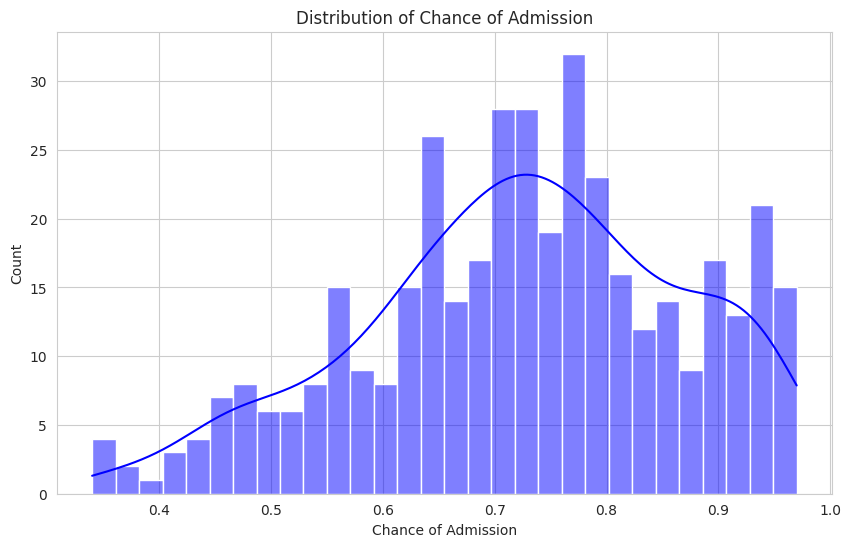

In [242]:
# Visualize the distribution of admission_chance
sns.set_style("whitegrid")  # This sets a nice background style
plt.figure(figsize=(10, 6))  # Adjust the figure size as per your requirement

sns.histplot(df['Admission_Chance'], kde=True, bins=30, color='blue')  # kde=True adds a Kernel Density Estimation plot

plt.title('Distribution of Chance of Admission')
plt.xlabel('Chance of Admission')
plt.ylabel('Count')

plt.show()  # Display the plot

In [243]:
# convert Admission_Chance to Low and Highcategory
df['Admission_Possibility'] = 0 # bad
df.loc[df['Admission_Chance'] > 0.73,'Admission_Possibility'] = 1 # good
df.head(2)

,ID,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Admission_Chance,Admission_Possibility
0,1,337,118,4,4.5,4.5,9.65,1,0.92,1
1,2,324,107,4,4.0,4.5,8.87,1,0.76,1


In [244]:
# remove imdb_score column
df2=df.drop('Admission_Chance', axis=1)
df2.head()

,ID,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Admission_Possibility
0,1,337,118,4,4.5,4.5,9.65,1,1
1,2,324,107,4,4.0,4.5,8.87,1,1
2,3,316,104,3,3.0,3.5,8.00,1,0
3,4,322,110,3,3.5,2.5,8.67,1,1
4,5,314,103,2,2.0,3.0,8.21,0,0


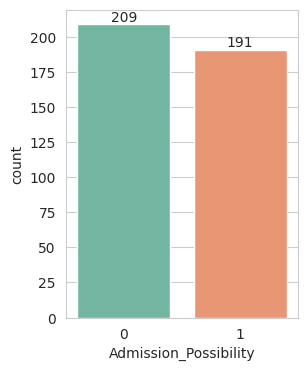

In [245]:
# caculate the number of students of different possibility group
plt.figure(figsize=(3,4))
ax = sns.countplot(x='Admission_Possibility',data=df2,palette="Set2")
for item in ax.containers:
    ax.bar_label(item,)

* As we can see from the chart above, most students admission possibility are **High** with a number of **365**.

#### Model 1 KNN

##### Model Building & Validation

In [246]:
# declare X variables and y variable
y = df2['Admission_Possibility']
X = df2.drop(['Admission_Possibility'], axis =1)
X.head()

,ID,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research
0,1,337,118,4,4.5,4.5,9.65,1
1,2,324,107,4,4.0,4.5,8.87,1
2,3,316,104,3,3.0,3.5,8.00,1
3,4,322,110,3,3.5,2.5,8.67,1
4,5,314,103,2,2.0,3.0,8.21,0


> Grid Search

**Grid search** is a hyperparameter tuning technique commonly used in machine learning, including classification analysis. Hyperparameters are parameters that are not learned by the model during training but need to be set before training begins. Grid search is used to systematically explore a range of hyperparameter combinations to find the set of hyperparameters that yields the best performance for a given machine learning algorithm.


##### Search for the optimal k value (GridSearch)

In [247]:
# evaluate the model by splitting into train and test sets & develop knn model (name it as knn)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


# Initialize knn Classifier() ... name your decision model "knn"
knn=KNeighborsClassifier()

# Train a knn model
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [248]:
#create a dictionary of all values we want to test for n_neighbors
params_knn = {'n_neighbors': np.arange(1, 25)}# frind the best k value from 1 to 25

#use gridsearch to test all values for n_neighbors
knn_gs = GridSearchCV(knn, params_knn, cv=5)# cv stands for cross validation

#fit model to training data
knn_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [249]:
#save best model
knn_best = knn_gs.best_estimator_

#check best n_neigbors value
print(knn_gs.best_score_)
print(knn_gs.best_params_)
print(knn_gs.best_estimator_)

0.8178571428571427
{'n_neighbors': 1}
KNeighborsClassifier(n_neighbors=1)


* From the above result, we can see that the **optimal k value should be 10 , so we set our n_neighbors to 10.**

In [250]:
# evaluate the model by splitting into train and test sets & develop knn model (name it as knn)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


# Initialize knn Classifier() ... name your decision model "knn"
knn=KNeighborsClassifier(n_neighbors=10)

# Train a knn model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [251]:
#Model evaluation
# http://scikit-learn.org/stable/modules/model_evaluation.html

print(metrics.accuracy_score(y_test, knn.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, knn.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, knn.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.roc_auc_score(y_test, knn.predict(X_test)))

0.8333333333333334
--------------------------------------------------------
[[56  6]
 [14 44]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.90      0.85        62
           1       0.88      0.76      0.81        58

    accuracy                           0.83       120
   macro avg       0.84      0.83      0.83       120
weighted avg       0.84      0.83      0.83       120

--------------------------------------------------------
0.8309232480533926


* The knn model is 83.33% accurate. Therefore, we expect that the model will be about **83.33% accurate** when the model is applied into a real-world situation.The roc_auc_scoreis **0.8309**.

#### Model 2 Logistic regression using Recursive Feature Selection (RFE)

> RFE

**Recursive Feature Selection (RFE)** is a feature selection technique used in machine learning to select a subset of relevant features from a larger set of features. RFE works by recursively fitting a model and eliminating the least important features based on their assigned importance scores. It's often used with algorithms that assign feature importance scores, such as some tree-based algorithms or models that provide coefficients for each feature, like linear regression.

In [252]:
# feature selection
model = LogisticRegression()
rfe = RFE(model, n_features_to_select=3)  #asking three best attributes
rfe = rfe.fit(X, y)
# summarize the selection of the attributes
print((rfe.support_))
print((rfe.ranking_))

[False False False False  True False  True  True]
[6 4 5 2 1 3 1 1]


In [253]:
# Features sorted by their rank
pd.DataFrame({'feature':X.columns, 'importance':rfe.ranking_})

,feature,importance
0,ID,6
1,GRE_Score,4
2,TOEFL_Score,5
3,University_Rating,2
4,SOP,1
5,LOR,3
6,CGPA,1
7,Research,1


In [254]:
#select 3 most significant features only
X_logistic = df2[['CGPA', 'LOR', 'SOP']]
print(X_logistic.head())

   CGPA  LOR  SOP
0  9.65  4.5  4.5
1  8.87  4.5  4.0
2  8.00  3.5  3.0
3  8.67  2.5  3.5
4  8.21  3.0  2.0


In [255]:
## develop logistic regression model with X_logistic (only 3 predictors or independent variables)
# evaluate the model by splitting into train and test sets and build a logistic regression model
# name it as "lr"
X_train, X_test, y_train, y_test = train_test_split(X_logistic, y, test_size=0.3, random_state=0)
lr = LogisticRegression(solver='lbfgs', max_iter=500)#—_iter refers to iteration
lr.fit(X_train, y_train)

#Model evaluation
print(metrics.accuracy_score(y_test, lr.predict(X_test)))
print(metrics.confusion_matrix(y_test, lr.predict(X_test)))
print(metrics.classification_report(y_test, lr.predict(X_test)))
print(metrics.roc_auc_score(y_test, lr.predict(X_test)))

0.8083333333333333
[[56  6]
 [17 41]]
              precision    recall  f1-score   support

           0       0.77      0.90      0.83        62
           1       0.87      0.71      0.78        58

    accuracy                           0.81       120
   macro avg       0.82      0.81      0.81       120
weighted avg       0.82      0.81      0.81       120

0.8050611790878753


The Logistic regression model is **80.83%** accurate. Therefore, we expect that the model will be about **80.83%** accurate when the model is applied into a real-world situation.The roc_auc_scoreis **0.8051**.

#### Model 3 Random Forest Classifier

In [256]:
# import package
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=20)    #building 20 decision trees
clf=clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8083333333333333

In [257]:
# generate evaluation metrics
print(metrics.accuracy_score(y_test, clf.predict(X_test))) #overall accuracy
print(metrics.confusion_matrix(y_test, clf.predict(X_test)))
print(metrics.classification_report(y_test, clf.predict(X_test)))
print(metrics.roc_auc_score(y_test, clf.predict(X_test)))

0.8083333333333333
[[58  4]
 [19 39]]
              precision    recall  f1-score   support

           0       0.75      0.94      0.83        62
           1       0.91      0.67      0.77        58

    accuracy                           0.81       120
   macro avg       0.83      0.80      0.80       120
weighted avg       0.83      0.81      0.80       120

0.8039488320355952


* The random forest model is 82.5% accurate. Therefore, we expect that the model will be about **82.5% accurate** when the model is applied into a real-world situation.The roc_auc_scoreis **0.8211**.

#### Model 4 Decision Trees Model by using SelectKbest

In [258]:
# feature selection
X_new = SelectKBest(chi2, k=4).fit_transform(X, y)
print(X_new)

[[337. 118.   4.   1.]
 [324. 107.   4.   1.]
 [316. 104.   3.   1.]
 ...
 [330. 116.   4.   1.]
 [312. 103.   3.   0.]
 [333. 117.   4.   1.]]


In [259]:
# identify the column indexes (and names)
selector = SelectKBest(chi2, k=4).fit(X, y)
idxs_selected = selector.get_support(indices=True)
print(idxs_selected)

[1 2 3 7]


In [260]:
#identify the column  names
X.columns[selector.get_support()]

Index(['GRE_Score', 'TOEFL_Score', 'University_Rating', 'Research'], dtype='object')

* **ID** column is not a good choice as predictor. So we neglect it.

In [261]:
# Build a decision tree model with those three features ... Split validation:train (70%) and test sets (30%)

# declare X variables and y variable
y = df2['Admission_Possibility']
X_new = df2[['GRE_Score', 'TOEFL_Score','University_Rating']]
X.head()

# split validation
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=0)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

# Initialize DecisionTreeClassifier() ... name your decision model "dt"
dt = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)

# Train a decision tree model
dt.fit(X_train, y_train)

dt_y = dt.predict(X_test)


#Model evaluation
# http://scikit-learn.org/stable/modules/model_evaluation.html
print(metrics.accuracy_score(y_test, dt.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, dt.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, dt.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.roc_auc_score(y_test, dt.predict(X_test)))

(280, 3) (280,) (120, 3) (120,)
0.825
--------------------------------------------------------
[[55  7]
 [14 44]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.89      0.84        62
           1       0.86      0.76      0.81        58

    accuracy                           0.82       120
   macro avg       0.83      0.82      0.82       120
weighted avg       0.83      0.82      0.82       120

--------------------------------------------------------
0.8228587319243604


* The Decision tree model is 82.5% accurate. Therefore, we expect that the model will be about **82.5% accurate** when the model is applied into a real-world situation.The roc_auc_scoreis **0.8229**.

#### Model 5 GradientBoostingClassifier

**Gradient Boosting** is a powerful machine learning ensemble technique used for both regression and classification tasks. It's a type of boosting algorithm that builds an ensemble of weak learners (usually decision trees) in a sequential manner, with each subsequent learner attempting to correct the errors made by the previous ones. The key idea behind Gradient Boosting is to combine the predictions of multiple weak models to create a strong predictive model.

In [262]:
# split validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# initialize
gb = GradientBoostingClassifier(n_estimators=100, random_state=0)

# fit the model
gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

In [263]:
#Model evaluation
# http://scikit-learn.org/stable/modules/model_evaluation.html
print(metrics.accuracy_score(y_test, gb.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, gb.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, gb.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.roc_auc_score(y_test, gb.predict(X_test)))

0.8
--------------------------------------------------------
[[54  8]
 [16 42]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.77      0.87      0.82        62
           1       0.84      0.72      0.78        58

    accuracy                           0.80       120
   macro avg       0.81      0.80      0.80       120
weighted avg       0.80      0.80      0.80       120

--------------------------------------------------------
0.7975528364849833


* The GradientBoosting model is **80%** accurate. Therefore, we expect that the model will be about **80% accurate** when the model is applied into a real-world situation.The roc_auc_scoreis **0.7976**.

#### Model 6 Support Vector Machine (SVM)

A Support Vector Machine (SVM) is a powerful and versatile machine learning algorithm primarily used for classification and regression tasks. SVMs are particularly effective for solving complex problems where the data points are not linearly separable. They work by finding a hyperplane in a high-dimensional feature space that best separates the data points of different classes while maximizing the margin between the classes.

Given a dataset with labeled examples (each belonging to one of two classes), an SVM aims to find the hyperplane that best separates the two classes. This hyperplane should have the maximum margin, which is the distance between the hyperplane and the nearest data points of each class.

In [264]:
# initialize
svm = SVC(gamma='auto', probability=True)
# fit the model
svm.fit(X_train, y_train)

SVC(gamma='auto', probability=True)

In [265]:
#Model evaluation
# http://scikit-learn.org/stable/modules/model_evaluation.html
print(metrics.accuracy_score(y_test, svm.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, svm.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, svm.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.roc_auc_score(y_test, svm.predict(X_test)))

0.6416666666666667
--------------------------------------------------------
[[61  1]
 [42 16]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.59      0.98      0.74        62
           1       0.94      0.28      0.43        58

    accuracy                           0.64       120
   macro avg       0.77      0.63      0.58       120
weighted avg       0.76      0.64      0.59       120

--------------------------------------------------------
0.6298665183537264


* The Support Vector Machine model is **64.17%** accurate. Therefore, we expect that the model will be about **64.17% accurate** when the model is applied into a real-world situation.The roc_auc_scoreis **0.6297**.

#### Model 7 Neural Network

In classification analysis, a neural network is a machine learning model that's specifically designed to classify input data into different classes or categories. Neural networks are used to solve classification problems by learning patterns and relationships in the input data and then making predictions about the class to which new, unseen data points belong.

A neural network for classification consists of several layers of interconnected nodes (neurons) that process the input data and produce a classification output.

In [266]:
# model building
nn = MLPClassifier(solver='lbfgs', max_iter=500,random_state=0)
nn.fit(X_train, y_train)

MLPClassifier(max_iter=500, random_state=0, solver='lbfgs')

In [267]:
#Model evaluation
# http://scikit-learn.org/stable/modules/model_evaluation.html
print(metrics.accuracy_score(y_test, nn.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, nn.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, nn.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.roc_auc_score(y_test, nn.predict(X_test)))

0.8333333333333334
--------------------------------------------------------
[[56  6]
 [14 44]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.90      0.85        62
           1       0.88      0.76      0.81        58

    accuracy                           0.83       120
   macro avg       0.84      0.83      0.83       120
weighted avg       0.84      0.83      0.83       120

--------------------------------------------------------
0.8309232480533926


* The Neural Network model is 83.33% accurate. Therefore, we expect that the model will be about **83.33% accurate** when the model is applied into a real-world situation.The roc_auc_scoreis **0.8309**.

###  Best classification model? What is the model accuracy? What is ROC score?

* The best classification model are **KNN** and **Neural Network**.  Their model accuracy and ROC score are the same.
* The model accuracy is **83.33%**.
* The ROC score is **0.8309**.

##  Storytelling

* Among the factors above **Admission_Chance** has **highest positive correlation** with **_CGPA, TOEFL_Score and GRE_Score_**.
* Among the factors above **Admission_Chance** has **relatively lower correlation** with **_Research Experience_**.
* Our best **regression model** indicates that **CGPA**,**TOEFL_Score**,**GRE_Score** play a very important role in the **Admission_Chance**. With the increase of the Cumulative GPA, TOEFL_Score and GRE_Score, the Admission Chance also increases.
* After building, validating and evaluating multiple **classification models**, we can see that we use **KNN and Neural Network** in predicting whether people will be admitted is **83.33% accurate**.
* We can confidently conclude that **CGPA**,**TOEFL_Score**,**GRE_Score** do increase the possibility of being abmitted by graduate school but **Research  experience** is not that important compared with other factors.